# Prosper Loan Data Analysis
## by Angie Koepcke

## Investigation Overview


This analysis focuses on the Prosper Loan dataset. The dataset contains 81 columns of data about consumer loans sold online to investors in an auction type platform.  The online market platform was a relatively new idea at inception, and there were some problems which occurred causing the SEC to get involved.

The Securities Act of 1933 requires securities, or “tradable financial assets”, be registered with the SEC.(1).  The goal of this legislation was to protect shareholders by mandating they be fully informed about all relevant data associated with their investment. It is not illegal to sell someone a bad loan, but it is illegal to withhold information showing that it is a bad investment.(2).  For the purposes of this Prosper data analysis report, securities are the loans provided to consumers by Prosper Marketplace, Inc. subsidiary Prosper Funding, LLC.(3).

There are specific exemptions which allow securities to be traded without registering with the SEC.  The securities may be exempt if they are traded within the borders of a state.  Once the trade crosses state lines, the security must be registered. Government securities can be exempt from registration, as well as offerings which are limited in size.(2). In November of 2008, the SEC court ordered Prosper to stop lending because it’s business practices were in violation of the Securities Act of 1933.  The Prosper loans division was allowed to resume business practices in July of 2009, after remediation activities.

Purchasers of loans between 2006 and 2008 filed a class action lawsuit against Prosper for selling “unregistered loans”, which Prosper did actually do  according to the SEC.  Did Prosper hide the fact the loans were unregistered, or did people just assume the loans were registered?  The suit also alleges “unqualified loans”, which is a loan that doesn’t meet strict requirements.  Again, did Prosper conceal data from purchasers? The purchasers were involved in loans using a new online bidding process. What data did the purchasers have regarding the loans?  Again, the Securities Act says you can sell risky loans, you just can’t conceal the risk.

The purpose of this data analysis is to look at various features of the data set and see if there are any outstanding issues with the data.  What does the data say about the loans and the borrowers?   


1. https://en.wikipedia.org/wiki/Security_(finance)
2. https://en.wikipedia.org/wiki/Securities_Act_of_1933
3. https://en.wikipedia.org/wiki/Prosper_Marketplace



## Dataset Overview


 The Prosper Loan data set contains loan data for various types of loans from 2005 to 2014. The data file was provided by Udacity.  The loans ranged in term from twelve to sixty months.

 The first step I completed was to upload the 'prosperLoanData.csv' file to my project folder in my jupyter notebook.  This way I could run .head() and .info() on the data and get an idea of what I was looking at.  I opened the Prosper Loan Data variable definitions in Google sheets.

 I also check to make sure all the packages I needed for this project were installed.  It turned out I had to install Seaborn, so I did this in Linux. After installing Seaborn, I checked the data using .head() and .info(). 

 There were 80 columns and 113,937 rows of data in the loan data file.  I had to decide which variables I wanted to explore.  The loan listing category, which classifies what the loan was for, and the state interested me right away.  Beyond that, I decided I needed to do more exploration and make some decisions. 

 I chose to look at loans by state, occupation, and reason for the loan. The year the loan was originated was significant according the the Wikipedia page for Prosper Marketplace, because loan purchasers filed a class action lawsuit alleging Prosper sold "unqualified" loans between 2006 and 2008. Also, in 2009, Prosper increased the credit score requirements for borrowers according to the [Wikipedia](https://en.wikipedia.org/wiki/Prosper_Marketplace) page, so this might be an interesting variable to look at.  The variables for net losses and loan status were also part of this analysis.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

from scipy.stats import norm

from matplotlib.pyplot import figure

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Prosper-df_new_1.csv')

#Let's create the dataframe for this analysis of missing state data in defaulted loans prior to 2009

df_defaulted = df.query('LoanStatus == "Defaulted"')
df_defaulted_pre_2009 = df_defaulted[df_defaulted['pre-2009']== True]
df_defaulted_post_2009 = df_defaulted[df_defaulted['pre-2009']==False]


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Defaulted Loans by Year

  The focus of this analysis will be the difference in the loan variables in the pre-2009 and post-2009 data.  
  
  The graph below shows there were more defaulted loans in the pre-2009 years.  I was surprised to see the lack of income verification throughout the range of years, in both the pre-2009 and post-2009 data.  The income verification variable wasn't significant as I thought it would be.  Clearly there is a difference in the loans prior to the 2009 intervention, as we can see from the visualization.

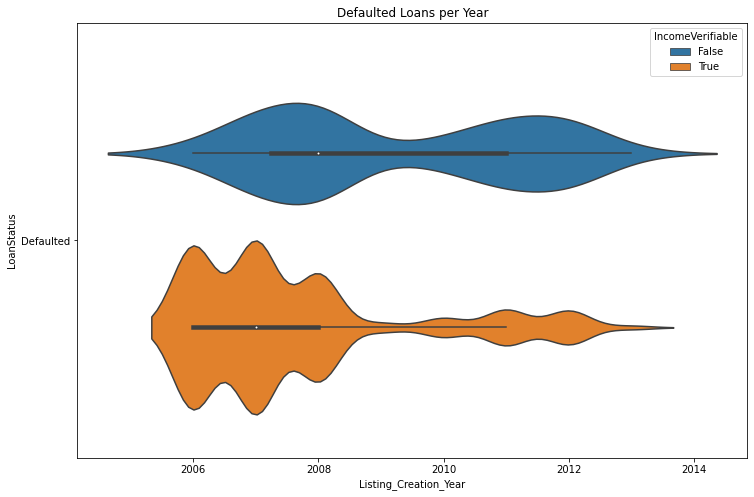

In [3]:
# This violin plot below shows the number of defaulted loans per year 
## with a distinction between those with and without verifiable income 

figure(figsize=(12,8))

df_defaulted = df.query('LoanStatus == "Defaulted"')

ax = sns.violinplot(data=df_defaulted, x='Listing_Creation_Year', y='LoanStatus', hue='IncomeVerifiable')

plt.title("Defaulted Loans per Year");

## Loans by Listing Category

  A point of interest in this analysis is, what are these loans for?  Below is a bar chart showing the bulk of the loans are for either debt consolidation, or the listing category was "not available".  The reason for the borrower obtaining the loan might be of interest to an investor.  We will look at the listings for the overall dataset, then we will look at the listings in pre-2009 and post-2009 data.
  
  Listing Category Key: 
 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

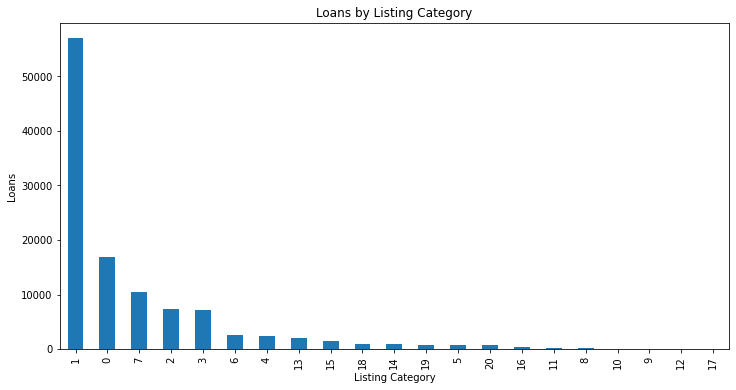

In [4]:
# A bar chart of the loan listing category to see which loan type was most popular
df['Listing_Category'].value_counts().plot(kind='bar',figsize=(12,6));

plt.title("Loans by Listing Category")


plt.xlabel("Listing Category")
plt.ylabel("Loans")
plt.show()

In [5]:


#Let's create the dataframe for this analysis of loan listing category 0-  "Not Available" for defaulted loans prior to 2009


df_pre_2009_no_cat = df_defaulted_pre_2009[df_defaulted_pre_2009['Listing_Category']== 0].Occupation.count()
df_post_2009_no_cat = df_defaulted_post_2009[df_defaulted_post_2009['Listing_Category']== 0].Occupation.count()





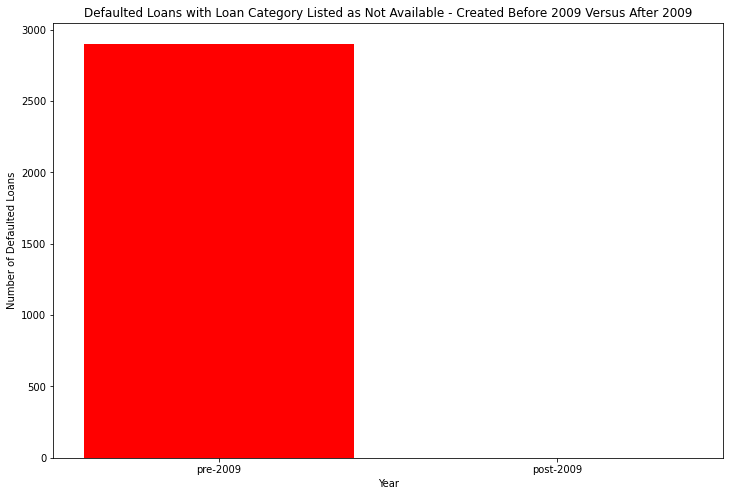

In [6]:
# Let's graph the difference in defaulted loans with category "Not Available" between the pre-2009 data and the post-2009 data

figure(figsize=(12,8))

plt.bar(["pre-2009","post-2009"],[df_pre_2009_no_cat, df_post_2009_no_cat], color='red')
plt.title("Defaulted Loans with Loan Category Listed as Not Available - Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans");

  The second graph shows that the loans created before 2009 were likely to have missing loan listing category data in the group of defaulted loans.  There weren't any defaulted loans created after 2009 which had missing loan listing category data.

## Occupation and Defaulted Loans

 The most popular occupation category for defaulted loans was 'Other'.  I would like to compare the nominal, categorical variable occupation in the pre-2009 years and post-2009 years to see if this missing/unqualified data shows a correlation to predicting risk.  The variable shows a risk correlation, but was this variable more present in the pre-2009 or post-2009 data?
 
 The answer is yes, the variable for missing occupation data was more prevalent in the pre-2009 data.  There weren't any defaulted loans created after 2009 where the occupation data was missing. Also, the missing occupation variable seems to correlate with defaulted loans.

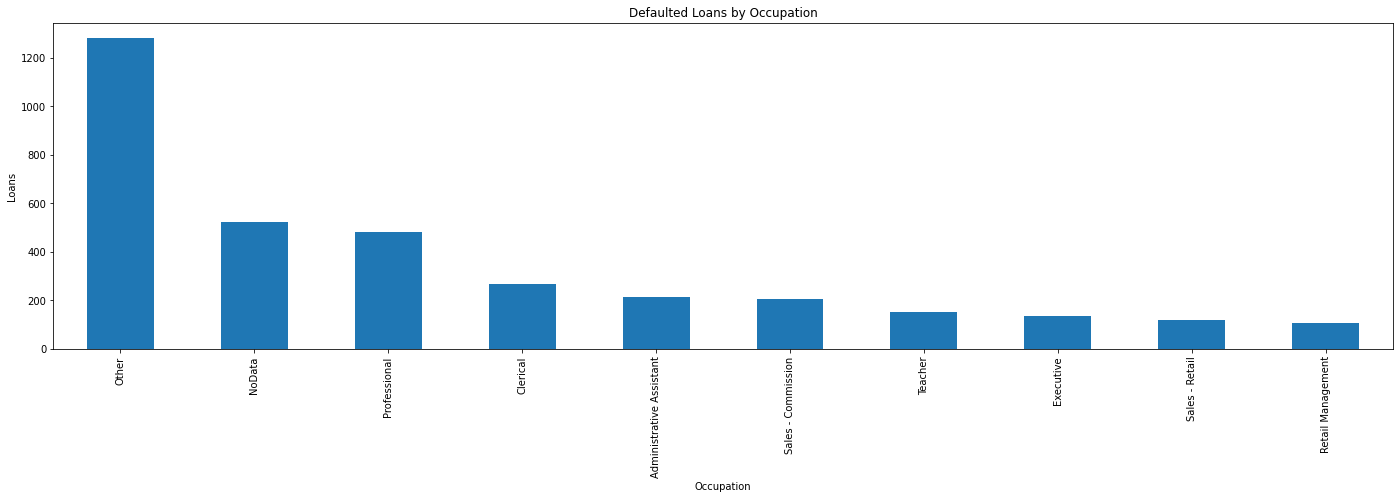

In [7]:
# Value counts for the Listing Category on defaulted loan


df_defaulted['Occupation'].value_counts().nlargest(10).plot(kind='bar', figsize=(24,6))

plt.title("Defaulted Loans by Occupation")


plt.xlabel("Occupation")
plt.ylabel("Loans")
plt.show();

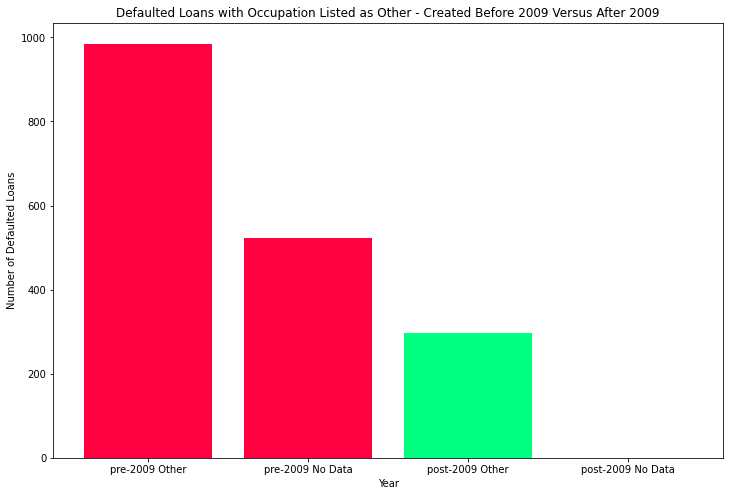

In [14]:
#Let's create the dataframe for this analysis of defaulted loans prior to 2009


pre_2009_occ_other = df_defaulted_pre_2009[df_defaulted_pre_2009['Occupation']== "Other"].Occupation.count()
pre_2009_occ_nodata = df_defaulted_pre_2009[df_defaulted_pre_2009['Occupation']== "NoData"].Occupation.count()
post_2009_occ_other = df_defaulted_post_2009[df_defaulted_post_2009['Occupation']== "Other"].Occupation.count()
post_2009_occ_nodata = df_defaulted_post_2009[df_defaulted_post_2009['Occupation']== "NoData"].Occupation.count()

# Let's graph the difference in defaulted loans between the pre-2009 data and the post-2009 data
# Hexchrome guide, https://www.w3schools.com/colors/colors_picker.asp

figure(figsize=(12,8))

plt.bar(["pre-2009 Other","pre-2009 No Data", "post-2009 Other", "post-2009 No Data"],[pre_2009_occ_other, pre_2009_occ_nodata, post_2009_occ_other, post_2009_occ_nodata], color =['#ff0040', '#ff0040', '#00ff80', '#00ff80'])
plt.title("Defaulted Loans with Occupation Listed as Other - Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans");

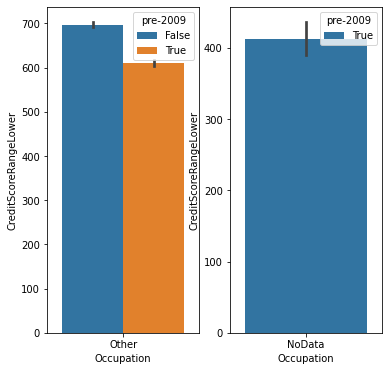

In [15]:
# Let's look at the occupation 'Other' and the lower range credit scores variables for pre and post 2009 defaulted loans

fig, axes =plt.subplots(1,2, figsize=(6,6))


df_defaulted_occ_other = df_defaulted[df_defaulted['Occupation']== "Other"]
df_defaulted_occ_nodata = df_defaulted[df_defaulted['Occupation']== "NoData"]

sns.barplot(x="Occupation", y="CreditScoreRangeLower", hue="pre-2009", data=df_defaulted_occ_other, orient='v',ax=axes[0]),
sns.barplot(x="Occupation", y="CreditScoreRangeLower", hue="pre-2009", data=df_defaulted_occ_nodata, orient='v',ax=axes[1]);

## Missing State Data and Defaulted Loans

  There are a significant number of loans with "NoData" for the state value. We can see in the second graph that there weren't any defaulted loans created after 2009 missing state data.  This is because the SEC requires loans traded across state lines to be registered with the SEC, therefore requiring the borrowers state data to be documented.

  The 'BorrowerState' is a nominal, categorical value. The number of loans per state could be analyzed by geographic region instead of state, however, I don't think this is a significant variable at this time.  It was significat that there were loans created prior to 2009 which were missing borrower state data.



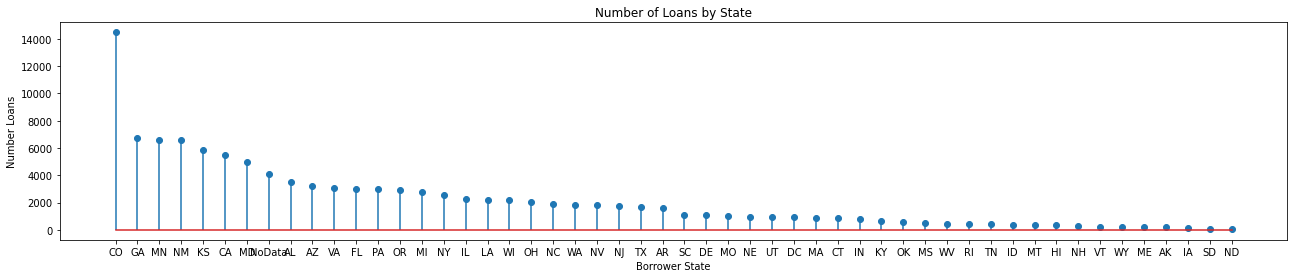

In [16]:
figure(figsize=(22,4))
x = df['BorrowerState'].unique()
lollipop = df.BorrowerState.value_counts()


plt.stem(x, lollipop)


plt.title("Number of Loans by State")


plt.xlabel("Borrower State")
plt.ylabel("Number Loans")

plt.show()


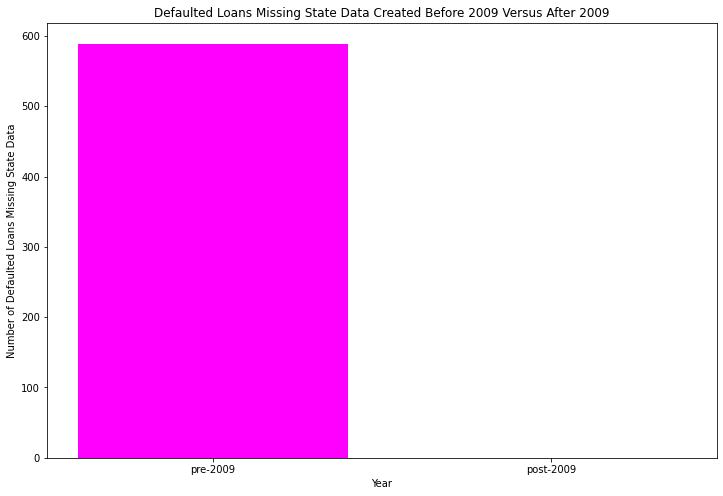

In [17]:
pre_2009_missing_state =df_defaulted_pre_2009[df_defaulted_pre_2009['BorrowerState'] == "NoData"].BorrowerState.count()
post_2009_missing_state =df_defaulted_post_2009[df_defaulted_post_2009['BorrowerState'] == "NoData"].BorrowerState.count()

figure(figsize=(12,8))

plt.bar(["pre-2009","post-2009"],[pre_2009_missing_state, post_2009_missing_state], color='magenta')
plt.title("Defaulted Loans Missing State Data Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans Missing State Data");

## Post SEC Intervention Increase in Credit Scores

The Wikipedia article mentioned that Prosper increased the credit score requirement after 2009.  The graph below shows this increase.  The graph shows the credit scores in relation to net principal loss in pre-2009 and post-2009 loans.  It is interesting that there are still losses in borrowers with higher credit scores, and since they were allowed to borrow more, they lost more.  There were losses across all credit scores.

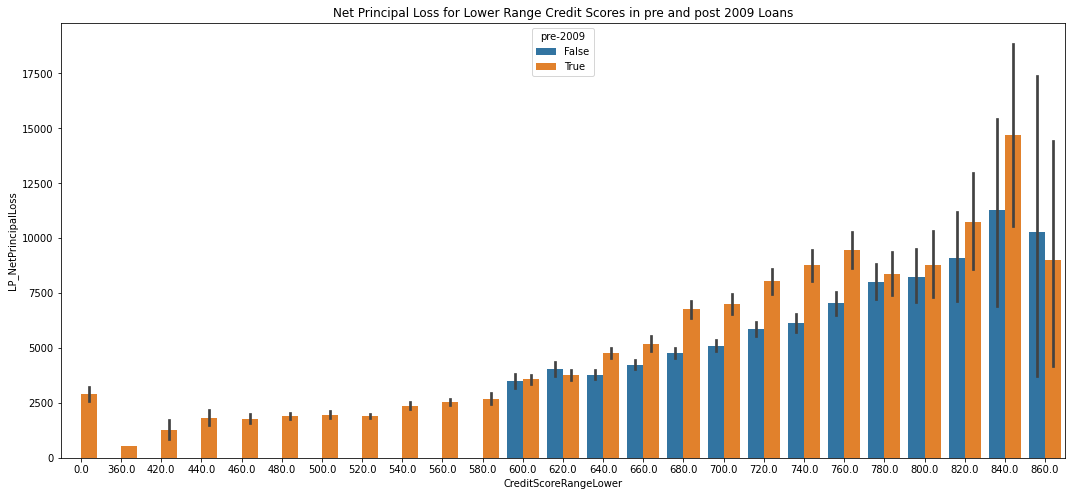

In [18]:
# Create a new dataframe for analysis

stats_df = df.query('LP_NetPrincipalLoss > 0')


# Net principal loss in lower range credit scores

figure(figsize=(18,8))

sns.barplot(x='CreditScoreRangeLower', y='LP_NetPrincipalLoss', hue='pre-2009', data=stats_df);

plt.title('Net Principal Loss for Lower Range Credit Scores in pre and post 2009 Loans')

plt.show()


In [19]:
!jupyter nbconvert Your_Slide_Deck_Name.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'Your_Slide_Deck_Name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to 